<a href="https://colab.research.google.com/github/viveksharma-niet/LinearRegressionUpgrad/blob/main/MultiLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [159]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [160]:
housingdata = pd.read_csv("https://raw.githubusercontent.com/viveksharma-niet/LinearRegressionUpgrad/refs/heads/main/Housing.csv")
housingdata.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


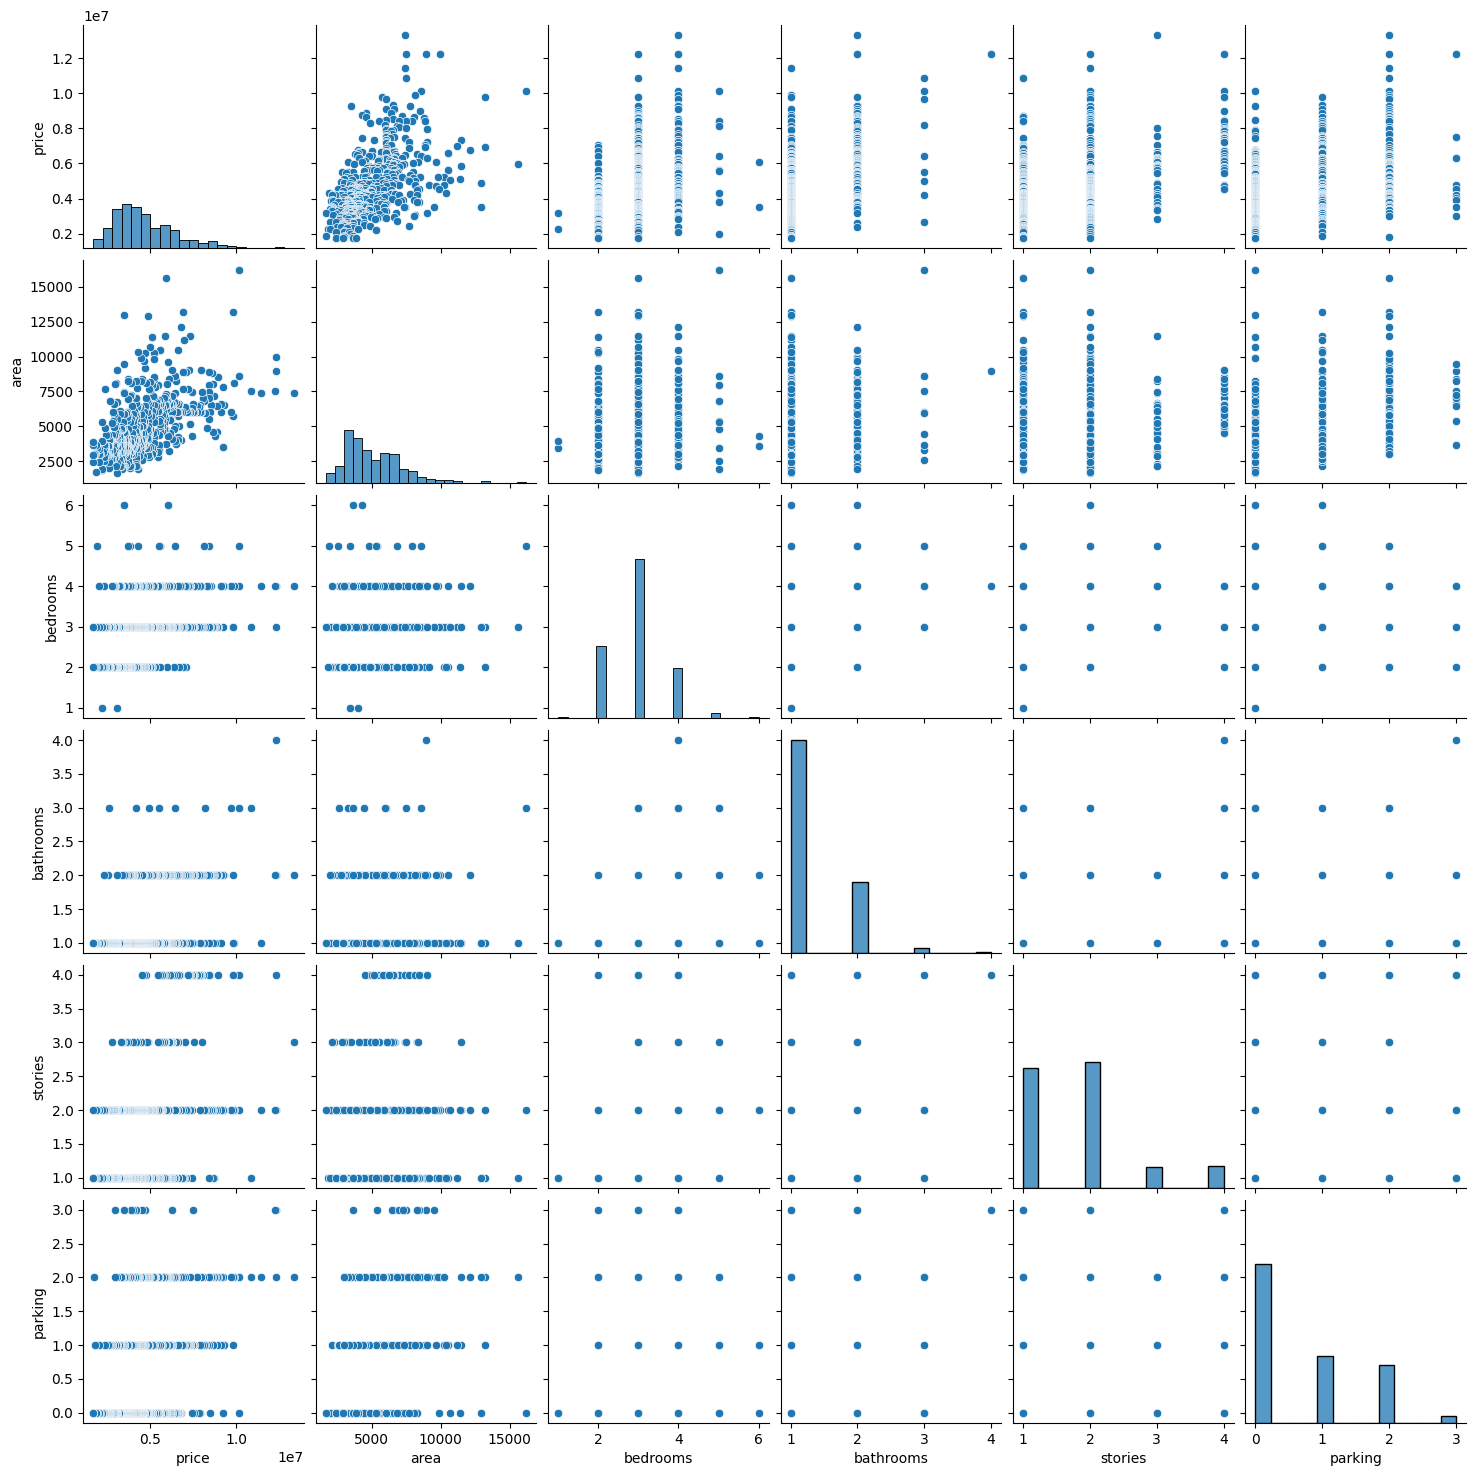

In [161]:
sns.pairplot(housingdata)

In [162]:
housingdata.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [163]:
## Show categorical values through boxplot

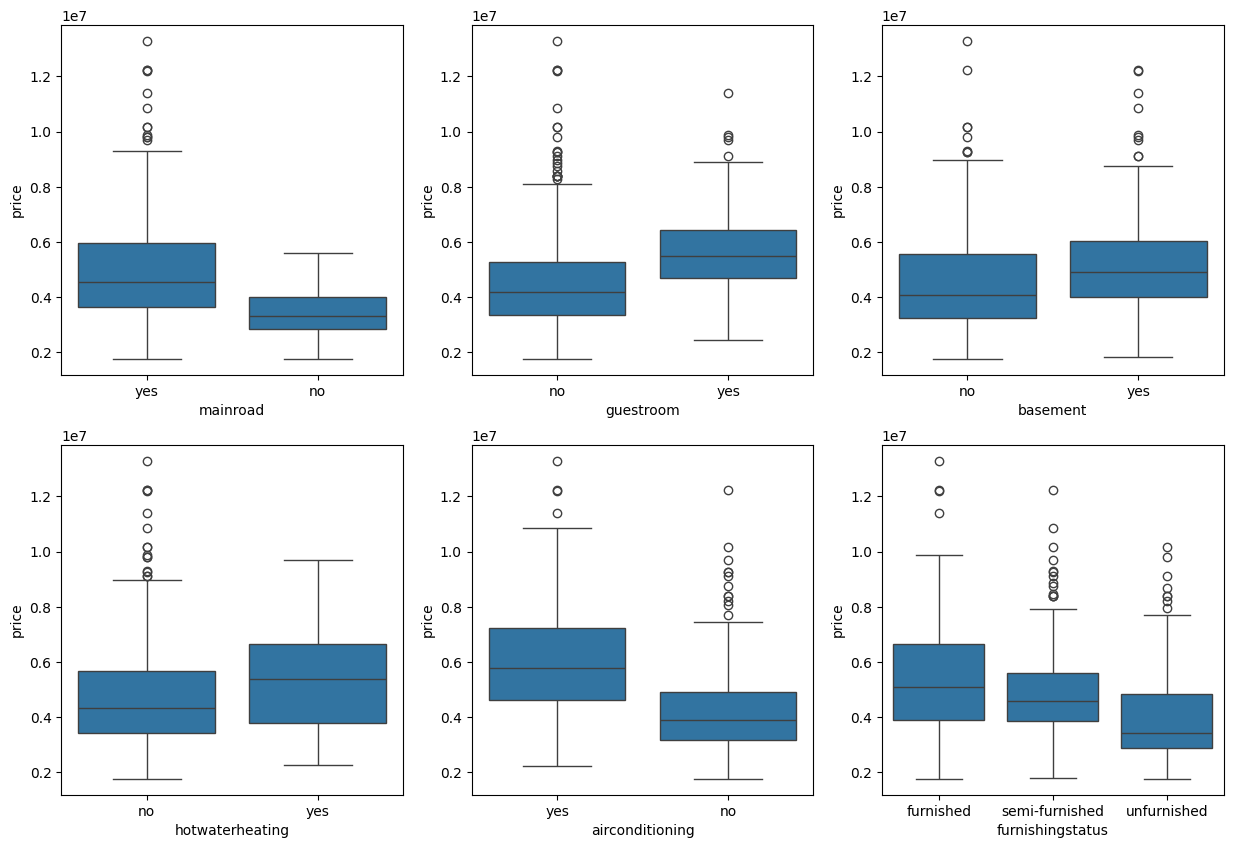

In [164]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.boxplot(x="mainroad", y="price", data=housingdata)

plt.subplot(2, 3, 2)
sns.boxplot(x="guestroom", y="price", data=housingdata)

plt.subplot(2, 3, 3)
sns.boxplot(x="basement", y="price", data=housingdata)

plt.subplot(2, 3, 4)
sns.boxplot(x="hotwaterheating", y="price", data=housingdata)

plt.subplot(2, 3, 5)
sns.boxplot(x="airconditioning", y="price", data=housingdata)

plt.subplot(2, 3, 6)
sns.boxplot(x="furnishingstatus", y="price", data=housingdata)

plt.show()

In [165]:
varlist = ['mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

In [166]:
housingdata.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [167]:
varlist = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea'] # Corrected typo
housingdata[varlist].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,yes,no,no,no,yes,yes
1,yes,no,no,no,yes,no
2,yes,no,yes,no,no,yes
3,yes,no,yes,no,yes,yes
4,yes,yes,yes,no,yes,no


In [168]:
housingdata[varlist] = housingdata[varlist].apply(lambda x: x.map({'yes':1, 'no':0}))

In [169]:
housingdata.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [170]:
status = pd.get_dummies(housingdata['furnishingstatus'], drop_first=True, dtype= int)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [171]:
housingdata = pd.concat([housingdata, status], axis=1)

In [172]:
housingdata = housingdata.drop(['furnishingstatus'], axis=1)

In [173]:
## Split into train and test

In [174]:
from sklearn.model_selection import train_test_split

In [175]:
df_train, df_test = train_test_split(housingdata, train_size=0.7, test_size=0.3, random_state=100)
print(df_train.shape)
print(df_test.shape)

(381, 14)
(164, 14)


In [176]:
from sklearn.preprocessing import MinMaxScaler

In [177]:
# Create a object
scaler = MinMaxScaler()


# create a list of numeric vars
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price'] # all numerical colums excpet for binary
# Fit the data



In [178]:
# fit() - learns xmin, xmax
# transform - x -xmin/xmax- xmin

# fit_transform

In [179]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


In [180]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [181]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596,0.414698,0.325459
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674,0.493318,0.469162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Step3 : Train the Model

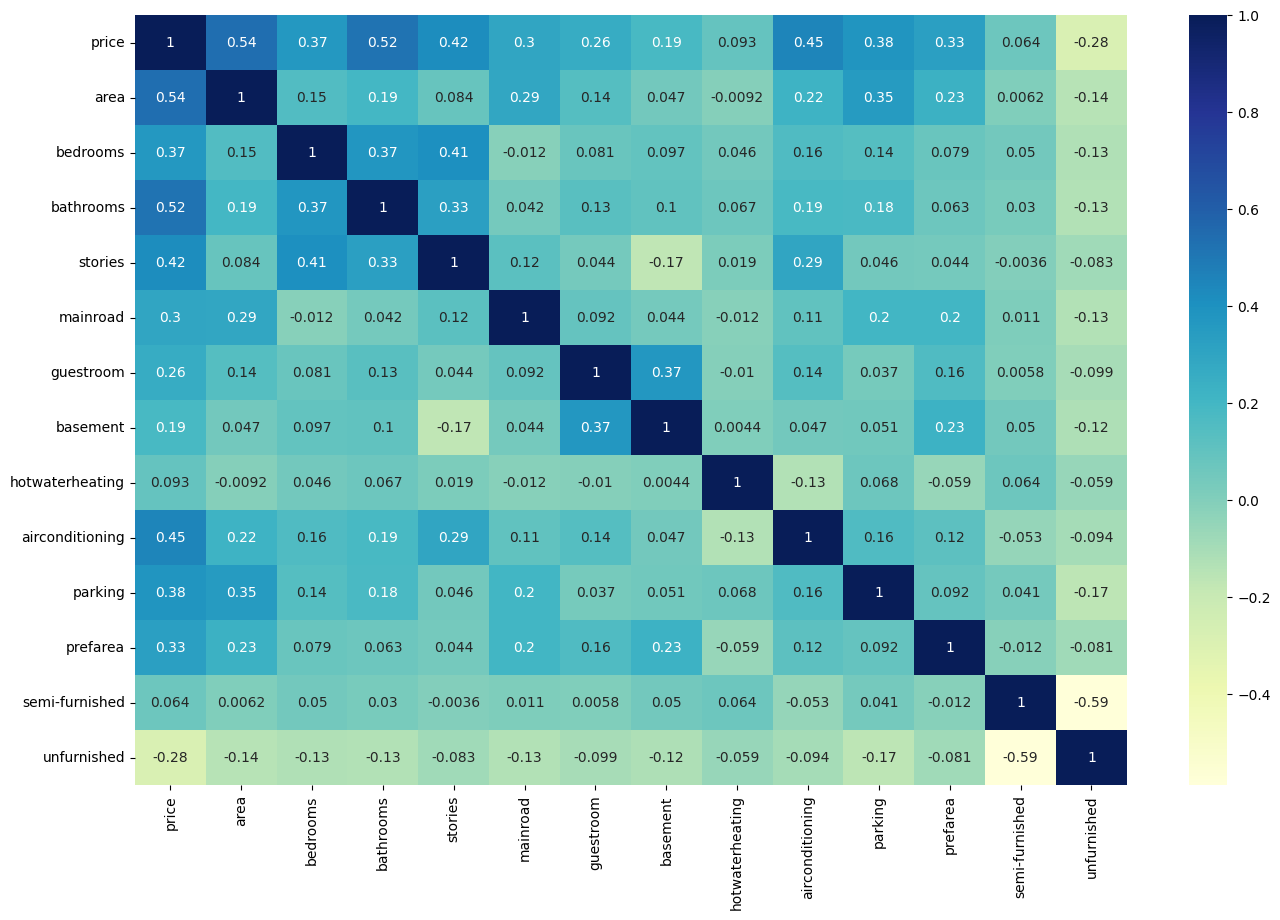

In [182]:
plt.figure(figsize=(16, 10))
sns.heatmap(housingdata.corr(), annot= True, cmap= 'YlGnBu')
plt.show()

## Forward Varibale addition

In [183]:
y_train = df_train.pop('price')
X_train = df_train

In [184]:
y_train.head()

,price
359,0.169697
19,0.615152
159,0.321212
35,0.548133
28,0.575758


In [185]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [187]:
import statsmodels.api as sm

In [189]:
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.params)
lr_model.summary()

const    0.126894
area     0.462192
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Sun, 11 Jan 2026   Prob (F-statistic):           3.15e-29
Time:                        13:23:18   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.000       0.102       0.152
area           0.4622      0.038     12.232      0.000       0.388       0.536
==============================================================================
Omnibus:                       67.313   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.063
Skew:                           0.925   Prob(JB):                     8.59e-32
Kurtosis:                       5.365   Cond. No.                         5.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Create the model again by adding bathrooms

In [190]:
X_train_sm = sm.add_constant(X_train[['area', 'bathrooms']])



In [191]:
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.params)
lr_model.summary()

const        0.104589
area         0.398396
bathrooms    0.298374
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Sun, 11 Jan 2026   Prob (F-statistic):           2.51e-54
Time:                        13:24:51   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.000       0.083       0.127
area           0.3984      0.033     12.192      0.000       0.334       0.463
bathrooms      0.2984      0.025     11.945      0.000       0.249       0.347
==============================================================================
Omnibus:                       62.839   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.790
Skew:                           0.784   Prob(JB):                     2.23e-37
Kurtosis:                       5.859   Cond. No.                         6.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Add one more variable bedrooms

In [192]:
X_train_sm = sm.add_constant(X_train[['area', 'bathrooms', 'bedrooms']])



In [193]:
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.params)
lr_model.summary()

const        0.041352
area         0.392211
bathrooms    0.259978
bedrooms     0.181863
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sun, 11 Jan 2026   Prob (F-statistic):           3.12e-57
Time:                        13:27:23   Log-Likelihood:                 297.76
No. Observations:                 381   AIC:                            -587.5
Df Residuals:                     377   BIC:                            -571.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.018      2.292      0.022       0.006       0.077
area           0.3922      0.032     12.279      0.000       0.329       0.455
bathrooms      0.2600      0.026     10.033      0.000       0.209       0.311
bedrooms       0.1819      0.041      4.396      0.000       0.101       0.263
==============================================================================
Omnibus:                       50.037   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.806
Skew:                           0.648   Prob(JB):                     7.92e-28
Kurtosis:                       5.487   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""